# Mini Projeto 1 - Regressão

Alguns pesquisadores geraram alguns dados por simulação de eficiência energética para a geometria de uma construção. Acontece que essa simulação gasta muito poder computacional, então seria interessante ter um modelo mais simples.

Assim, queremos tentar prever a carga de aquecimento e a carga de resfriamento com base nessas geometrias. Essas cargas se referem à quanta energia térmica precisariamos adicionar ou remover do ambiente, para manter a temperatura num intervalo aceitável.

Como esses dados são simulados, __é muito fácil gerar um conjunto novo, de teste, então não se preocupe com isso__. 

Qual seria o melhor modelo pra prever a carga de aquecimento e a carga de resfriamento? O quão bom ele consegue ser?

## Importanto as bibliotecas e os dados

In [420]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import graphviz

from sklearn.model_selection import train_test_split, KFold

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [291]:
df = pd.read_csv('ENB2012_data.csv', sep= ";")
    
renomear=  {'X1': 'RelativeCompactness',
'X2': 'SurfaceArea',
'X3': 'WallArea',
'X4': 'RoofArea',
'X5': 'OverallHeight',
'X6': 'Orientation',
'X7': 'GlazingArea',
'X8':'GlazingAreaDistribution',
'Y1': 'HeatingLoad',
'Y2': 'CoolingLoad'}

df.rename(renomear, axis=1, inplace=True)
df.head(3)

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    float64
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    float64
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
 10  Unnamed: 10              0 non-null      float64
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(12)
memory usage: 121.6 KB


In [293]:
df = df.drop(columns=['Unnamed: 10', 'Unnamed: 11'], axis=1)
df.head(3)

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33


In [294]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1291     True
1292     True
1293     True
1294     True
1295     True
Length: 1296, dtype: bool

In [295]:
df.isnull().sum()

RelativeCompactness        528
SurfaceArea                528
WallArea                   528
RoofArea                   528
OverallHeight              528
Orientation                528
GlazingArea                528
GlazingAreaDistribution    528
HeatingLoad                528
CoolingLoad                528
dtype: int64

In [296]:
df.dropna(inplace=True)

## Separando os dados 

In [297]:
X = df.drop(columns = ['HeatingLoad', 'CoolingLoad']) # features
y1 = df['HeatingLoad'] # target de heating
y2 = df['CoolingLoad'] # target de cooling

## Separando os dados de treino, validação e teste

In [298]:
# escolhendo a semente para garantir a reproducibilidade dos resultados

# Quando  random.state = None, como default é utilizado o numpy.random. 
SEED = 42
np.random.seed(SEED)


# Na primeira etapa vamos dividir os dados em teste e um conjunto de dados restante, que chamarei de treino.

# target de heating
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y1, test_size=0.2, shuffle=True) 

# target de cooling
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y2, test_size=0.2, shuffle=True)

# não foi utilizado # stratify=y, por houve um erro -> ValueError: #The least populated class in y has only 1 member, which is too few. 
                                                                   # The minimum number of groups for any class cannot be less than 2.

print ("treino1")
print(X_train1.shape)
print(y_train1.shape)

print ("teste1")
print(X_test1.shape)
print(y_test1.shape)

print (" ")

print ("treino2")
print(X_train2.shape)
print(y_train2.shape)

print ("teste2")
print(X_test2.shape)
print(y_test2.shape)

treino1
(614, 8)
(614,)
teste1
(154, 8)
(154,)
 
treino2
(614, 8)
(614,)
teste2
(154, 8)
(154,)


## Conhcendo os dados 

Como não quero "sujar" 100% a minha percepção, trabalharei somente com os dados de treino + validação nessa etapa.

Os dados de teste ficaram em uma "caixa preta", porém como quero utilizar o cross validation não há como verificar os dados e não visualizar junto os ddaos de validação. 

In [299]:
# concatenando os dados de treino 
dadosY1 = pd.concat([X_train1, y_train1], axis=1)
dadosY1.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad
60,0.82,612.5,318.5,147.0,7.0,2.0,0.10,1.0,23.53
618,0.64,784.0,343.0,220.5,3.5,4.0,0.40,2.0,18.90
346,0.86,588.0,294.0,147.0,7.0,4.0,0.25,2.0,29.27
294,0.90,563.5,318.5,122.5,7.0,4.0,0.25,1.0,32.84
231,0.66,759.5,318.5,220.5,3.5,5.0,0.10,4.0,11.43


In [300]:
dadosY2 = pd.concat([X_train2, y_train2], axis=1)
dadosY2.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,CoolingLoad
71,0.76,661.5,416.5,122.5,7.0,5.0,0.10,1.0,33.67
354,0.79,637.0,343.0,147.0,7.0,4.0,0.25,2.0,36.77
446,0.82,612.5,318.5,147.0,7.0,4.0,0.25,4.0,28.76
330,0.64,784.0,343.0,220.5,3.5,4.0,0.25,1.0,21.09
621,0.62,808.5,367.5,220.5,3.5,3.0,0.40,2.0,17.38


In [301]:
# verificando a estatística descritiva dos dados Y1
dadosY1.describe()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.761678,673.829805,318.819218,177.505293,5.221498,3.511401,0.235423,2.799674,22.155033
std,0.105424,88.161209,43.335953,44.960238,1.751195,1.108635,0.134152,1.551908,10.054280
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000
25%,0.660000,612.500000,294.000000,147.000000,3.500000,3.000000,0.100000,1.250000,12.977500
50%,0.740000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000,18.250000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000,31.545000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000


In [302]:
# verificando a estatística descritiva dos dados Y2
dadosY2.describe()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,CoolingLoad
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.764055,671.635179,319.178339,176.228420,5.261401,3.491857,0.234528,2.804560,24.615847
std,0.104834,87.309815,44.015647,45.242694,1.751390,1.102762,0.133884,1.556205,9.471443
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,10.900000
25%,0.690000,612.500000,294.000000,122.500000,3.500000,3.000000,0.100000,1.000000,15.785000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,3.000000,0.250000,3.000000,22.020000
75%,0.820000,735.000000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000,33.155000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,47.590000


Nota-se que há valores que possume um range bem grande. Para a aplicação do KNN será necessário normalizar os dados.

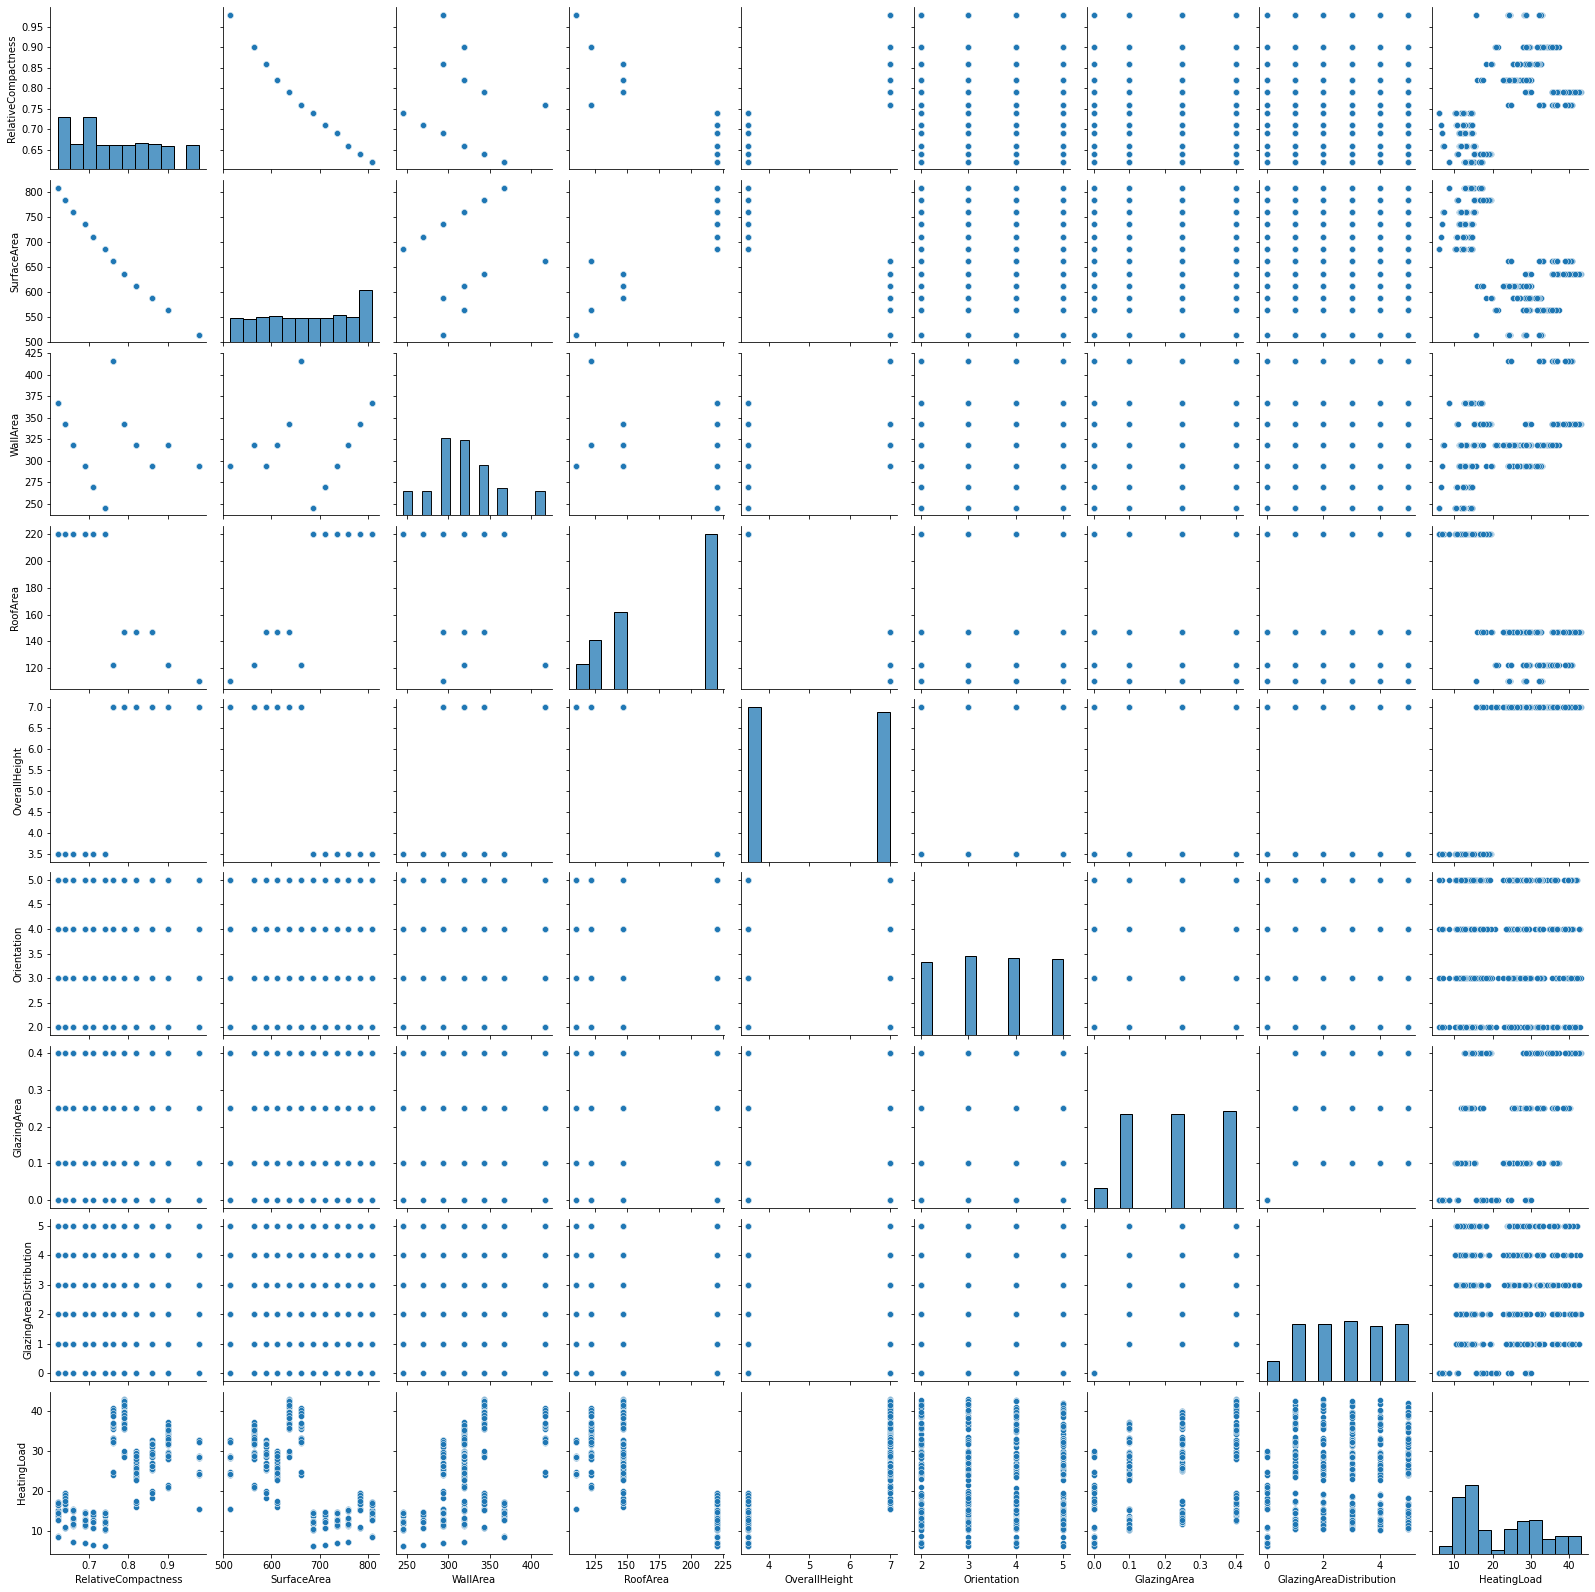

In [303]:
# verificando o comportamento do dados Y1
sns.pairplot( data = dadosY1);

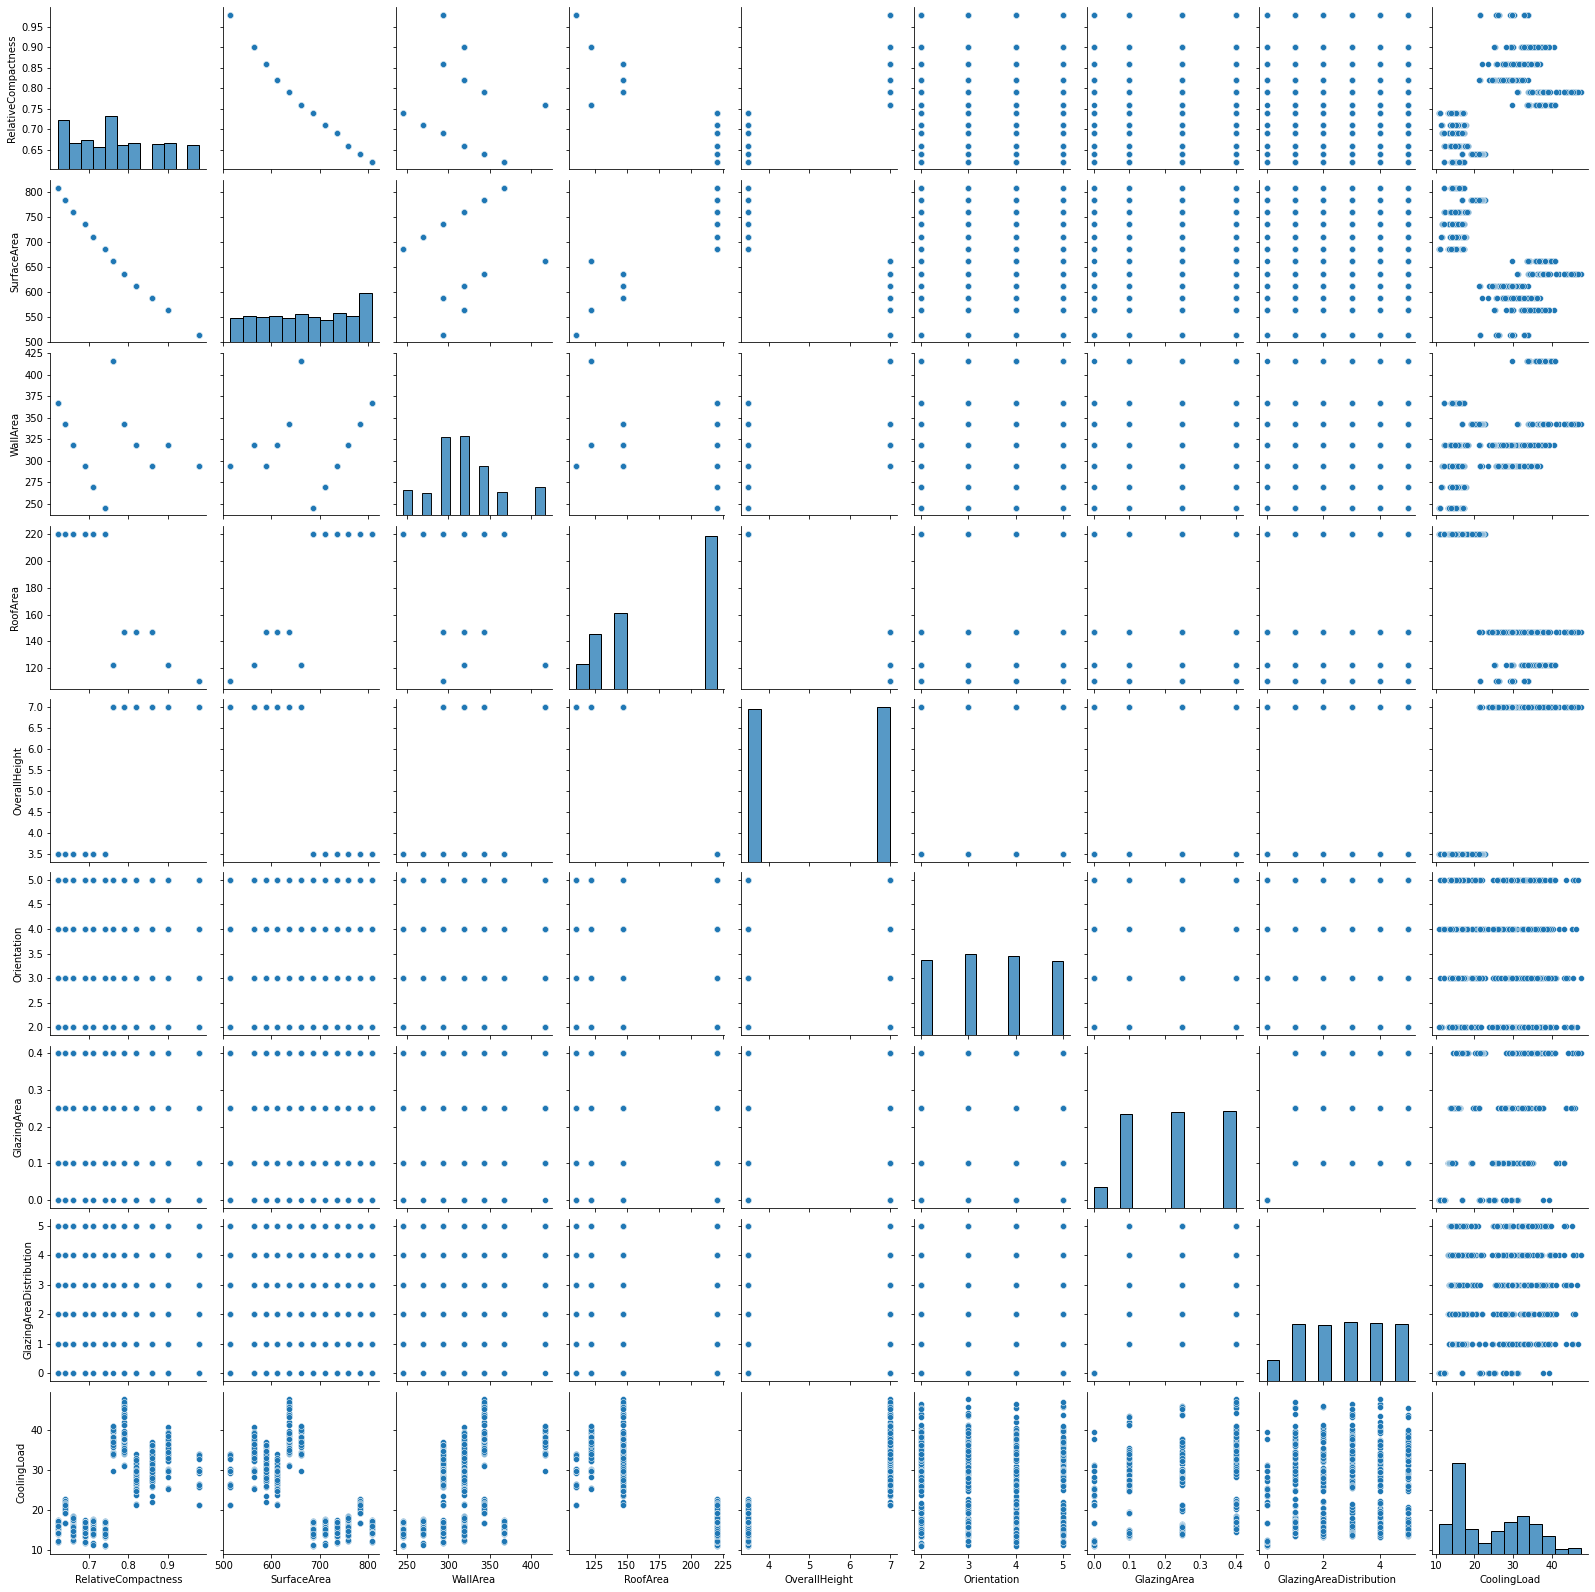

In [304]:
# verificando o comportamento do dados Y2
sns.pairplot( data = dadosY2);

### Verificando a distribuição dos dados

**HeatingLoad**

In [305]:
for i in X_train1.columns:
    histograma = px.histogram (dadosY1, x =i, marginal = 'box', nbins = 30)  
    histograma.update_layout(title= ("Histograma simples: " + i))
    histograma.show()

**CoolingLoad**

In [306]:
for i in X_train1.columns:
    histograma = px.histogram (dadosY2, x =i, marginal = 'box', nbins = 30)  
    histograma.update_layout(title= ("Histograma simples: " + i))
    histograma.show()
    

### Verificando a correlação

**HeatingLoad**

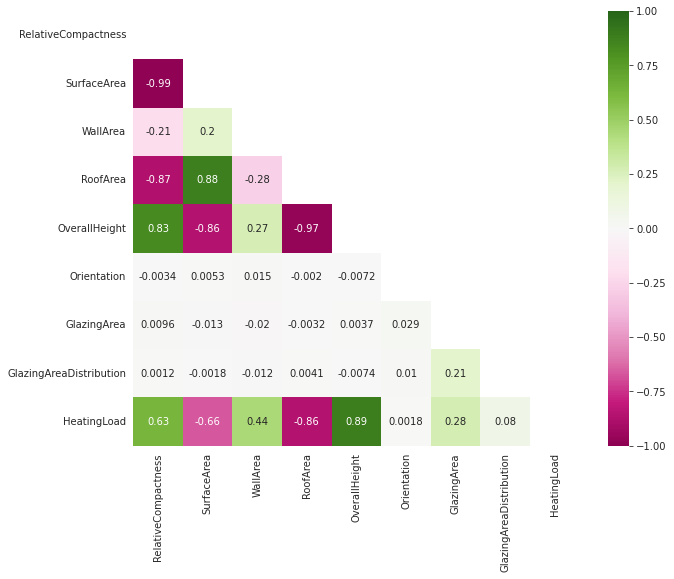

In [307]:
# verificando a correlação pearson entre as variáveis Y1

# 1- gerando a correlação de Perason para vinho branco
correlacao_pearson = dadosY1.corr()

#2- Gerando mapa heatmap
mask = np.zeros_like(correlacao_pearson)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,8))
    ax = sns.heatmap(correlacao_pearson, mask=mask, annot=True, vmin=-1, vmax=1,cmap="PiYG")

**CoolingLoad**

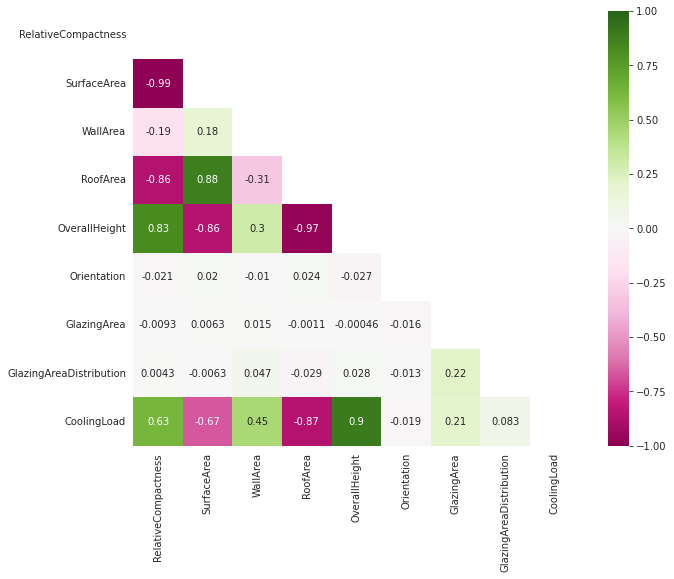

In [309]:
# verificando a correlação pearson entre as variáveis Y2

# 1- gerando a correlação de Perason para vinho branco
correlacao_pearson = dadosY2.corr()

#2- Gerando mapa heatmap
mask = np.zeros_like(correlacao_pearson)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,8))
    ax = sns.heatmap(correlacao_pearson, mask=mask, annot=True, vmin=-1, vmax=1,cmap="PiYG")

De forma geral, nota-se que há uma lata correlação entre RelativeCompactness * SurfaceArea

Além disso, observa-se que as features Orientation e GlazingAreaDistribution possuem uma correlação proxima do zero, ou seja, correlação nula.

Por esse motivos, as features SurfaceArea, Orientation e GlazingAreaDistribution serão retiradas  dos dados para a modelagem. 

# Implementando o aprendizado de máquina 

In [312]:
X_train1= X_train1.drop(['SurfaceArea', 'Orientation', 'GlazingAreaDistribution'], axis=1)
X_train2= X_train2.drop(['SurfaceArea', 'Orientation', 'GlazingAreaDistribution'], axis=1)

## HeatingLoad

### Regressão Linear

In [313]:
# definindo o algoritimo 
model_LR= LinearRegression()

# usando o KFold como forma de separar o CV
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [314]:
X_train_arr = X_train1.values
y_train_arr = y_train1.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # Treinando o modelo da iteração
    model_LR.fit(KFold_X_train, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_LR.predict(KFold_X_val)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")

# EX: MAPE = 40% -> nosso modelo faz previsões que em média a diferença entre o valor previsto e o real equivale a 40% do valor real,  tanto para mais quanto para menos.

MAE:  2.0508
RSME:  2.9293
R²adj:  0.9051
MAPE: 9.7961%


### Árvore de Decisão

In [339]:
# definindo o algoritimo 
model_DT= DecisionTreeRegressor(max_depth=7, random_state=SEED)

# usando o KFold como forma de separar o CV
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [340]:
X_train_arr = X_train1.values
y_train_arr = y_train1.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # Treinando o modelo da iteração
    model_DT.fit(KFold_X_train, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_DT.predict(KFold_X_val)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")


MAE:  0.3434
RSME:  0.4801
R²adj:  0.9974
MAPE: 1.583%


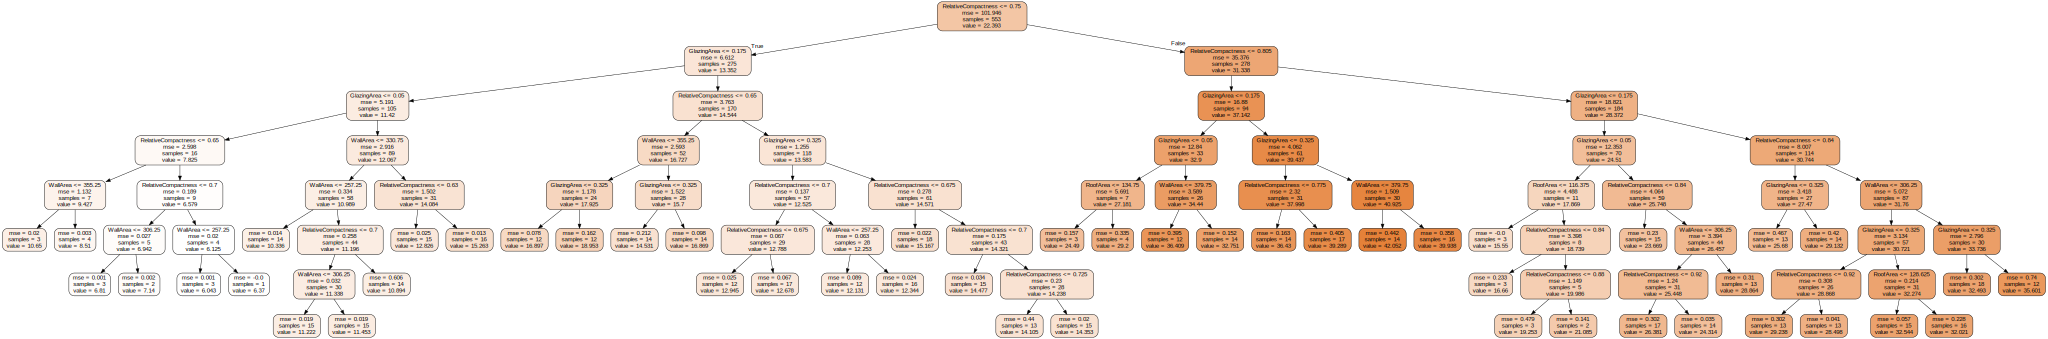

In [341]:
features = X_train1.columns
dot_data = export_graphviz(model_DT, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features)
grafico = graphviz.Source(dot_data)
grafico

### KNN

In [346]:
model_KNN =  KNeighborsRegressor(n_neighbors=3)
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [347]:
X_train_arr = X_train1.values
y_train_arr = y_train1.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # normalizando os dados
    std = StandardScaler()
    X_train_std = std.fit_transform(KFold_X_train)
    X_val_std = std.transform(KFold_X_val)
    
    # Treinando o modelo da iteração
    model_KNN.fit(X_train_std, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_KNN.predict(X_val_std)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")



MAE:  0.435
RSME:  0.6425
R²adj:  0.9954
MAPE: 2.0968%


### Random Forest

In [362]:
model_RF = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=SEED)

Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [363]:
X_train_arr = X_train1.values
y_train_arr = y_train1.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # Treinando o modelo da iteração
    model_RF.fit(KFold_X_train, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_RF.predict(KFold_X_val)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")


MAE:  0.3475
RSME:  0.4841
R²adj:  0.9974
MAPE: 1.6128%


**AdaBoost**

In [417]:
#Instanciar o modelo com 300 árvores
model_AB = AdaBoostRegressor(n_estimators=100, random_state=SEED)
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)


In [419]:
X_train_arr = X_train1.values
y_train_arr = y_train1.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # Treinando o modelo da iteração
    model_AB.fit(KFold_X_train, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_AB.predict(KFold_X_val)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")


MAE:  1.4631
RSME:  1.8227
R²adj:  0.9629
MAPE: 7.5304%


**SVR**

In [445]:
model_SVR = SVR()
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [446]:
X_train_arr = X_train1.values
y_train_arr = y_train1.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # normalizando os dados
    std = StandardScaler()
    X_train_std = std.fit_transform(KFold_X_train)
    X_val_std = std.transform(KFold_X_val)
    
    # Treinando o modelo da iteração
    model_SVR.fit(X_train_std, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_SVR.predict(X_val_std)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")



MAE:  1.5813
RSME:  2.5662
R²adj:  0.9256
MAPE: 7.9579%


### Testando o modelo 

Dentre todos os modelos estudados. O que se mostou ter melhores resultados foi a árvore de decisão.


In [322]:
X_test1= X_test1.drop(['SurfaceArea', 'Orientation', 'GlazingAreaDistribution'], axis=1)

In [366]:
# Não consegiu fazer com o resultado da validação cruzada 
model = DecisionTreeRegressor(max_depth=7, random_state=SEED)

model.fit(X_train1, y_train1)
y_pred = model.predict(X_test1)

  
#Calcula as métricas
MAE = mean_absolute_error(y_test1,y_pred)
RSME = mean_squared_error(y_test1,y_pred, squared=False)
r2adj = (1 - ((1 - r2_score(y_test1, y_pred)) * (len(y_test1) - 1)) / (len(y_test1) - X_train1.shape[1] - 1))
MAPE = np.mean(np.abs((y_test1 - y_pred) /y_test1)) * 100

# Exibindo as métricas
print ("MAE: ", np.mean(MAE).round(4))
print ("RSME: ", np.mean(RSME).round(4))
print ("R²adj: ", np.mean(r2adj).round(4))
print (f"MAPE: {np.mean(MAPE).round(4)}%")


MAE:  0.3727
RSME:  0.5018
R²adj:  0.9975
MAPE: 1.662%


### Treinando o modelo com todos os  dados

In [367]:
# Não consegiu fazer com o resultado da validação cruzada 
model = DecisionTreeRegressor(max_depth=7, random_state=SEED)
model.fit(X, y1)

DecisionTreeRegressor(max_depth=7, random_state=42)

## CoolingLoad

### Regressão Linear

In [368]:
# definindo o algoritimo 
model_LR= LinearRegression()

# usando o KFold como forma de separar o CV
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [369]:
X_train_arr = X_train2.values
y_train_arr = y_train2.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # Treinando o modelo da iteração
    model_LR.fit(KFold_X_train, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_LR.predict(KFold_X_val)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")

# EX: MAPE = 40% -> nosso modelo faz previsões que em média a diferença entre o valor previsto e o real equivale a 40% do valor real,  tanto para mais quanto para menos.

MAE:  2.2306
RSME:  3.1275
R²adj:  0.8772
MAPE: 8.9143%


### Árvore de Decisão

In [381]:
# definindo o algoritimo 
model_DT= DecisionTreeRegressor(max_depth=8, random_state=SEED)

# usando o KFold como forma de separar o CV
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [382]:
X_train_arr = X_train2.values
y_train_arr = y_train2.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # Treinando o modelo da iteração
    model_DT.fit(KFold_X_train, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_DT.predict(KFold_X_val)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")


MAE:  1.0906
RSME:  1.7076
R²adj:  0.9634
MAPE: 3.8126%


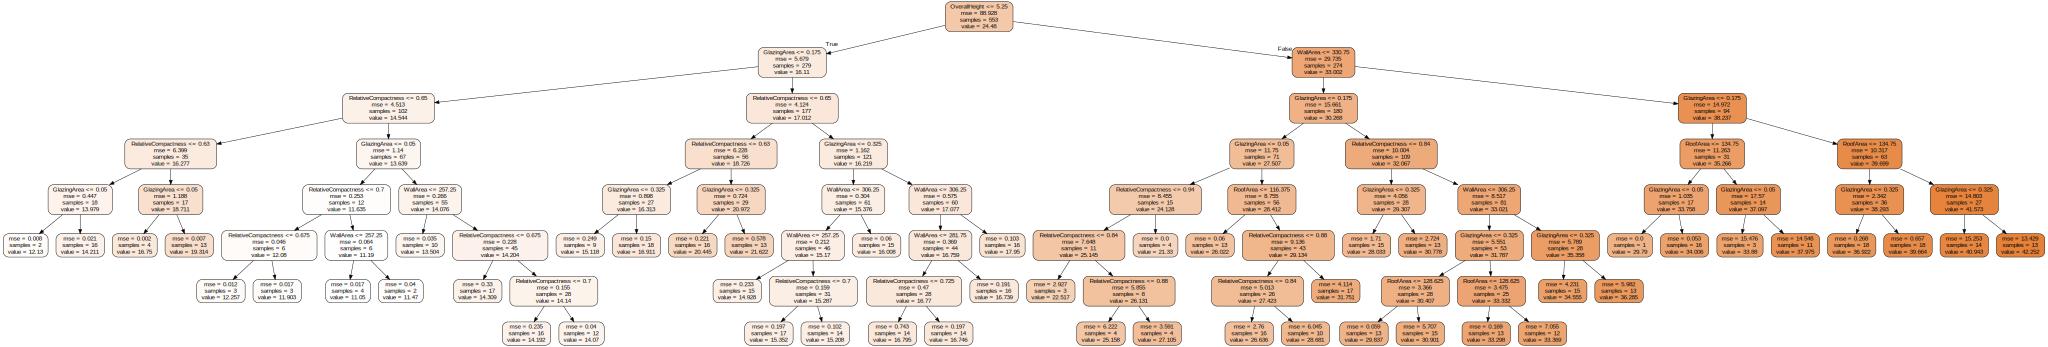

In [383]:
features = X_train2.columns
dot_data = export_graphviz(model_DT, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features)
grafico = graphviz.Source(dot_data)
grafico

### KNN

In [392]:
model_KNN =  KNeighborsRegressor(n_neighbors=2)
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [393]:
X_train_arr = X_train2.values
y_train_arr = y_train2.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # normalizando os dados
    std = StandardScaler()
    X_train_std = std.fit_transform(KFold_X_train)
    X_val_std = std.transform(KFold_X_val)
    
    # Treinando o modelo da iteração
    model_KNN.fit(X_train_std, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_KNN.predict(X_val_std)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")



MAE:  1.1947
RSME:  1.9841
R²adj:  0.9507
MAPE: 4.1741%


### Random Forest

In [406]:
model_RF = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=SEED)

Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [407]:
X_train_arr = X_train2.values
y_train_arr = y_train2.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # Treinando o modelo da iteração
    model_RF.fit(KFold_X_train, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_RF.predict(KFold_X_val)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")


MAE:  1.0938
RSME:  1.7027
R²adj:  0.9636
MAPE: 3.8325%


**AdaBoost**

Treinamento do modelo

In [415]:
#Instanciar o modelo com 300 árvores
model_AB = AdaBoostRegressor(n_estimators=100, random_state=SEED)
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)


In [416]:
X_train_arr = X_train2.values
y_train_arr = y_train2.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # Treinando o modelo da iteração
    model_AB.fit(KFold_X_train, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_AB.predict(KFold_X_val)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")


MAE:  1.8425
RSME:  2.364
R²adj:  0.9289
MAPE: 7.2968%


**SVR**

In [439]:
model_SVR = SVR()
Kfold = KFold(n_splits = 10, shuffle=True, random_state=SEED)

In [440]:
X_train_arr = X_train2.values
y_train_arr = y_train2.values

list_MAE = []
list_RSME = []
list_R2adj = []
list_MAPE = []


i = 1
for train_index, val_index in Kfold.split(X_train1, y_train1):
 
    # Pegando o X e o y de treino e de validação para aquela iteração
    KFold_X_train, KFold_X_val = X_train_arr[train_index], X_train_arr[val_index]
    KFold_y_train, KFold_y_val = y_train_arr[train_index], y_train_arr[val_index]
    
    # normalizando os dados
    std = StandardScaler()
    X_train_std = std.fit_transform(KFold_X_train)
    X_val_std = std.transform(KFold_X_val)
    
    # Treinando o modelo da iteração
    model_SVR.fit(X_train_std, KFold_y_train)
    
    # Fazendo as previsões no "fold" de validação
    y_pred = model_SVR.predict(X_val_std)
    
  
    #Calcula as métricas
    MAE = mean_absolute_error(KFold_y_val,y_pred)
    RSME = mean_squared_error(KFold_y_val,y_pred, squared=False)
    r2adj = (1 - ((1 - r2_score(KFold_y_val, y_pred)) * (len(KFold_y_val) - 1)) / (len(KFold_y_val) - KFold_X_train.shape[1] - 1))
    MAPE = np.mean(np.abs((KFold_y_val - y_pred) / KFold_y_val)) * 100

    
    # Salvando as métricas na lista
    list_MAE.append(MAE)
    list_RSME.append(RSME)
    list_R2adj.append(r2adj)
    list_MAPE.append(MAPE)
    i += 1


# Exibindo as métricas
print ("MAE: ", np.mean(list_MAE).round(4))
print ("RSME: ", np.mean(list_RSME).round(4))
print ("R²adj: ", np.mean(list_R2adj).round(4))
print (f"MAPE: {np.mean(list_MAPE).round(4)}%")



MAE:  1.8703
RSME:  2.848
R²adj:  0.8973
MAPE: 7.4016%


### Testando o modelo 

Novemnte, dentre todos os modelos estudados, o que se mostou ter melhores resultados foi a árvore de decisão.


In [448]:
X_test2 = X_test2.drop(['SurfaceArea', 'Orientation', 'GlazingAreaDistribution'], axis=1)

In [449]:
# Não consegiu fazer com o resultado da validação cruzada 
model = DecisionTreeRegressor(max_depth=7, random_state=SEED)

model.fit(X_train2, y_train2)
y_pred = model.predict(X_test2)

  
#Calcula as métricas
MAE = mean_absolute_error(y_test2,y_pred)
RSME = mean_squared_error(y_test2,y_pred, squared=False)
r2adj = (1 - ((1 - r2_score(y_test2, y_pred)) * (len(y_test2) - 1)) / (len(y_test2) - X_train2.shape[1] - 1))
MAPE = np.mean(np.abs((y_test2 - y_pred) /y_test2)) * 100

# Exibindo as métricas
print ("MAE: ", np.mean(MAE).round(4))
print ("RSME: ", np.mean(RSME).round(4))
print ("R²adj: ", np.mean(r2adj).round(4))
print (f"MAPE: {np.mean(MAPE).round(4)}%")


MAE:  1.1215
RSME:  1.74
R²adj:  0.9666
MAPE: 3.7908%


### Treinando o modelo com todos os  dados

In [451]:
# Não consegiu fazer com o resultado da validação cruzada 
model = DecisionTreeRegressor(max_depth=7, random_state=SEED)
model.fit(X, y2)

DecisionTreeRegressor(max_depth=7, random_state=42)

# Conclusão

Os modelos não foram tão bons para a predição de CoolingLoad com foram para HeatingLoad